## Image Classification Using Transfer Learning and a Built-in Dataset
# Task 2

In [9]:
# Step 1: Install necessary libraries and load the CIFAR-10 dataset

In [12]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical


# Load CIFAR-10 dataset
#(cifar10_train, cifar10_test), (train_labels, test_labels) = keras.datasets.cifar10.load_data()


In [14]:
# 1. Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [16]:
# Step 2: Preprocess the dataset and normalize pixel values

In [18]:
# 2. Normalize the pixel values (scale them between 0 and 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [20]:
# 3. One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [22]:
# 4. Create a simple feedforward neural network (MLP)
model = Sequential()

# Flatten the input image (32x32x3 -> 3072) for the dense layers
model.add(Flatten(input_shape=(32, 32, 3)))

# First hidden layer with 256 neurons
model.add(Dense(256, activation='relu'))

# Second hidden layer with 256 neurons
model.add(Dense(256, activation='relu'))

# Output layer (10 neurons for 10 classes) with softmax activation
model.add(Dense(10, activation='softmax'))


In [24]:
# 5. Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [26]:
# 6. Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 855,050 (3.26 MB)

 Trainable params: 855,050 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# 7. Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2763 - loss: 2.0081 - val_accuracy: 0.3486 - val_loss: 1.7806
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3971 - loss: 1.6830 - val_accuracy: 0.3910 - val_loss: 1.7130
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4300 - loss: 1.6039 - val_accuracy: 0.4291 - val_loss: 1.6083
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4519 - loss: 1.5314 - val_accuracy: 0.4610 - val_loss: 1.4982
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4654 - loss: 1.4916 - val_accuracy: 0.4795 - val_loss: 1.4670
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4780 - loss: 1.4619 - val_accuracy: 0.4756 - val_loss: 1.4837
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4890 - loss: 1.4363 - val_accuracy: 0.4794 - val_loss: 1.4681
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4960 - loss: 1.4158 - val_accuracy: 0.

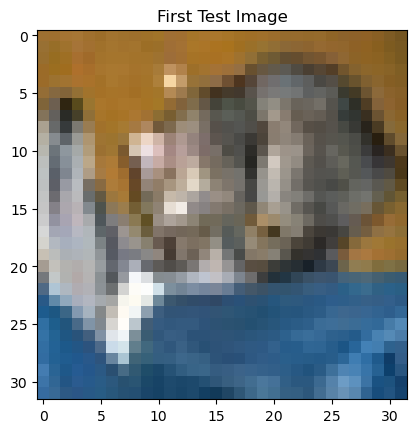

In [29]:
import matplotlib.pyplot as plt

# Display the first test image
plt.imshow(X_test[0], cmap='gray')
plt.title("First Test Image")
plt.show()

In [22]:
# VGG16 architecture with top layer removed
base_model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained model
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=base_model.input, outputs=outputs)


In [24]:
# CNN 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [26]:
model = models.Sequential()  # build model
 
 
model.add(layers.InputLayer(shape=(32, 32, 3)))  # Input layer
 
# cnn layers
model.add(layers.Conv2D(32, (3, 3), activation='relu'))  # First Conv2D layer : filter
model.add(layers.MaxPooling2D((2, 2)))  # First MaxPooling layer
 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Second Conv2D layer
model.add(layers.MaxPooling2D((2, 2)))  # Second MaxPooling layer
 
# build normal ann
model.add(layers.Flatten())  # Flattening the output from Conv layers : 1 column 
model.add(layers.Dense(64, activation='relu'))  # Fully connected layer
model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

In [28]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [30]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
 
y_train = to_categorical(y_train, 10)  # 10 classes (0-9 digits)
y_test = to_categorical(y_test, 10)

In [31]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.0990 - loss: 2.3029 - val_accuracy: 0.0977 - val_loss: 2.3028
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.1017 - loss: 2.3028 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.0973 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3029
Epoch 4/5
 330/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.1051 - loss: 2.3025

In [32]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build a simple ANN model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=64, callbacks=[early_stopping])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8452 - loss: 0.5602 - val_accuracy: 0.9477 - val_loss: 0.1816
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9537 - loss: 0.1619 - val_accuracy: 0.9632 - val_loss: 0.1264
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9692 - loss: 0.1070 - val_accuracy: 0.9657 - val_loss: 0.1151
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9783 - loss: 0.0782 - val_accuracy: 0.9716 - val_loss: 0.0992
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9839 - loss: 0.0609 - val_accuracy: 0.9701 - val_loss: 0.1016
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9863 - loss: 0.0500 - val_accuracy: 0.9749 - val_loss: 0.0883
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9904 - loss: 0.0375 - val_accuracy: 0.9739 - val_loss: 0.0884
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9915 - loss: 0.0316 - val_accuracy: 0.

In [34]:
# Evaluate the trained model on the test data and report accuracy and loss

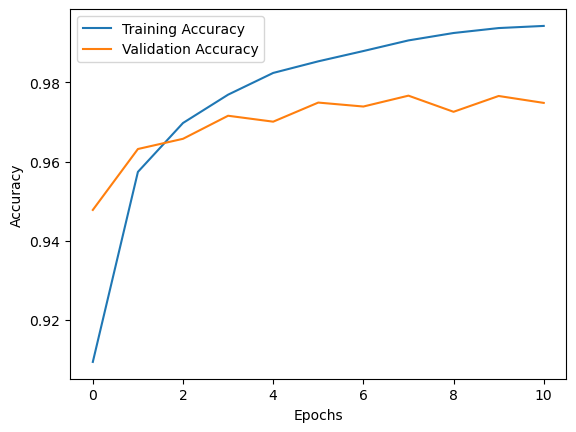

In [36]:
# Plot training and validation accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

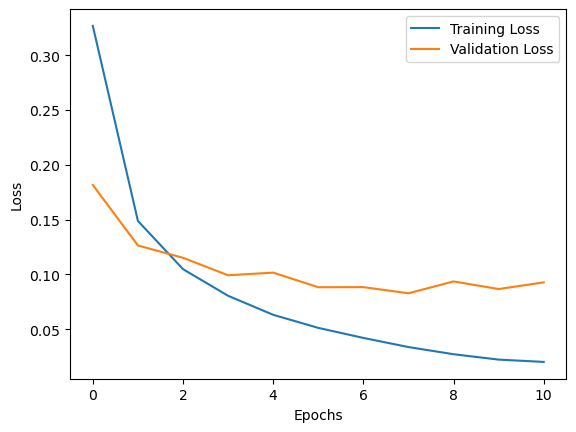

In [38]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

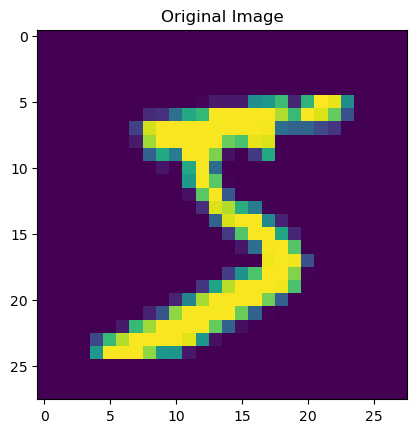

In [40]:
# Plot original image
plt.figure()
plt.title("Original Image")
plt.imshow(x_train[0]);